In [1]:
## Import all required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler

## Data Gathering

In [2]:
df1=pd.read_csv(r"C:\Users\sachi\Desktop\Home Loan\Data\loan_sanction_train.csv")
df2=pd.read_csv(r"C:\Users\sachi\Desktop\Home Loan\Data\loan_sanction_test.csv")

In [3]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
categorical_column=[]
continuous_column=[]
for i in list(df1.columns):
    if df1[i].dtype=="O":
        categorical_column.append(i)
    else:
        continuous_column.append(i)

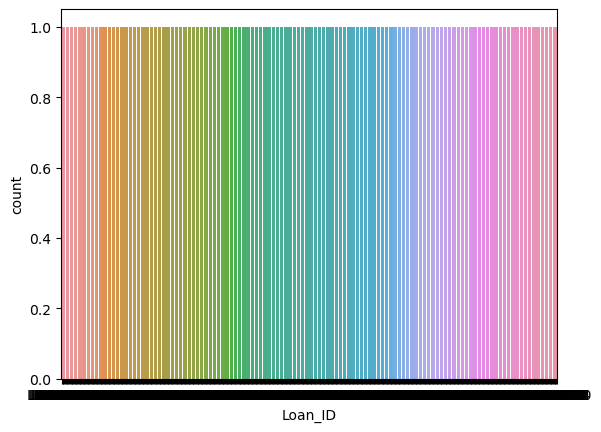

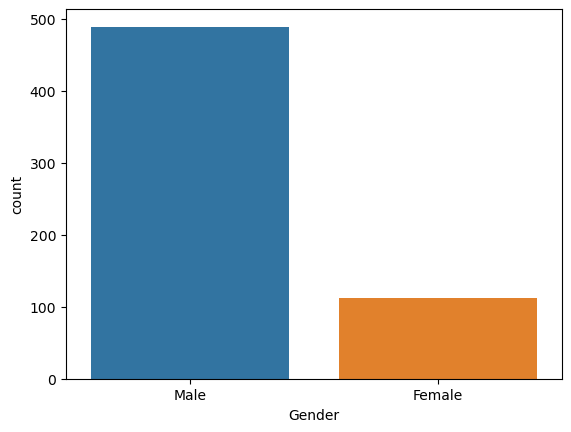

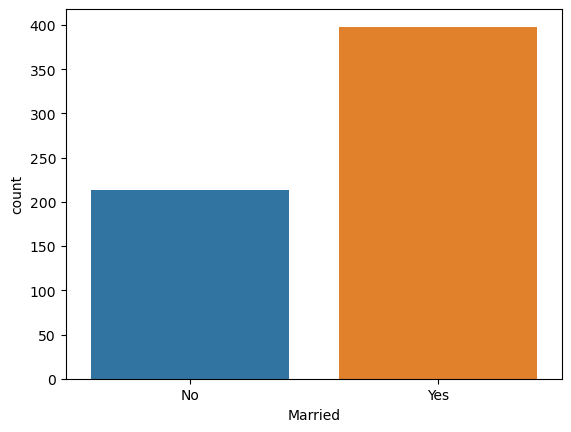

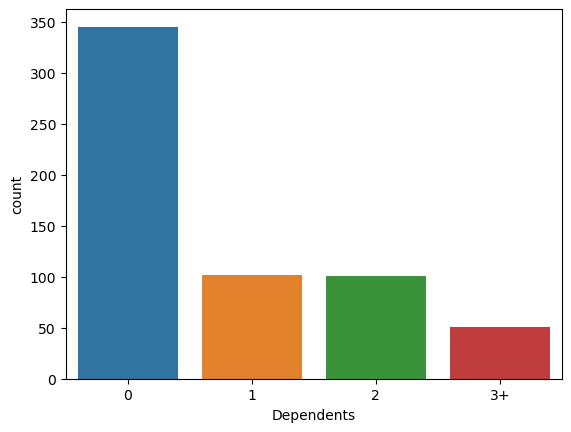

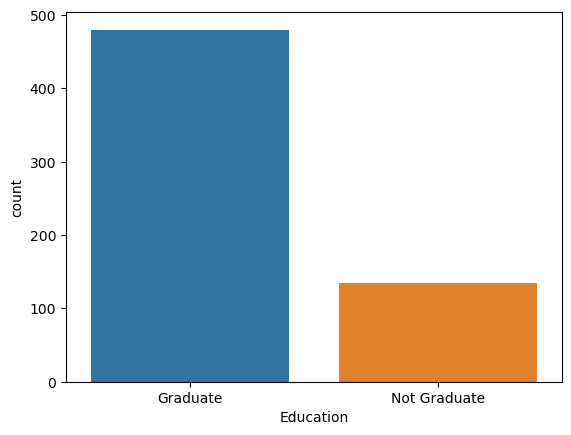

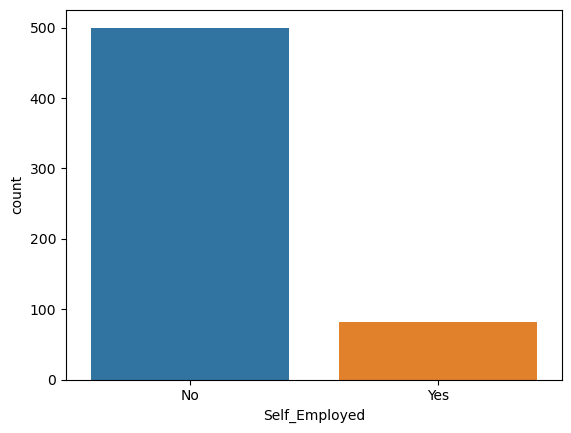

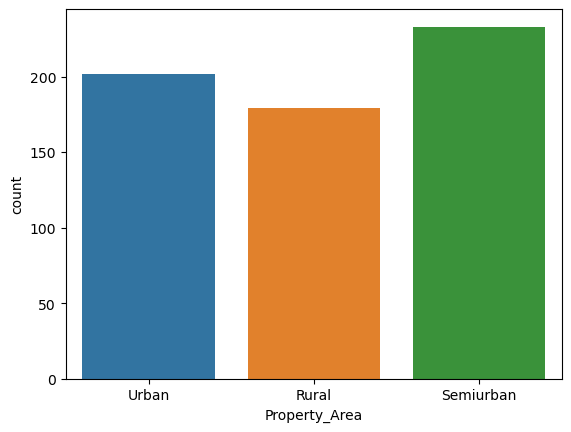

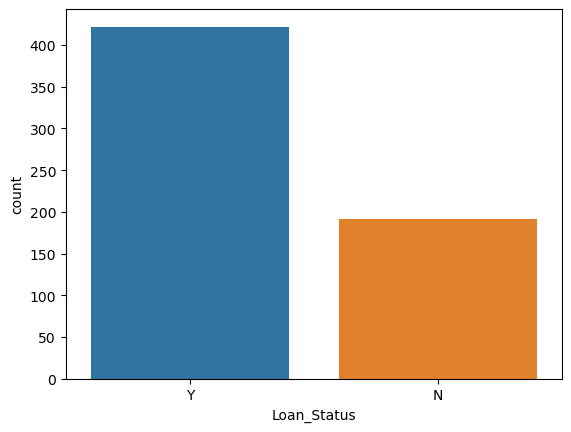

In [49]:
for i in categorical_column:
    sns.countplot(x=df1[i])
    plt.show()

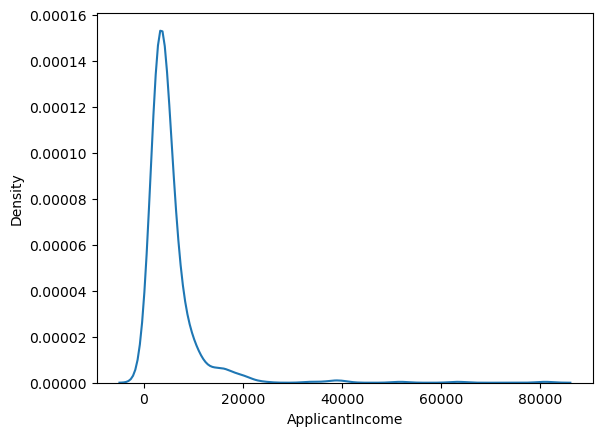

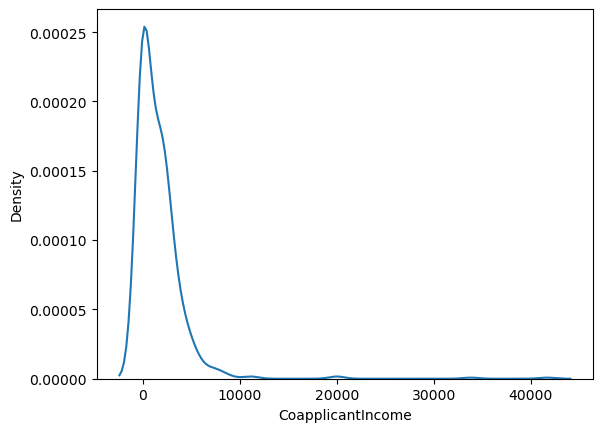

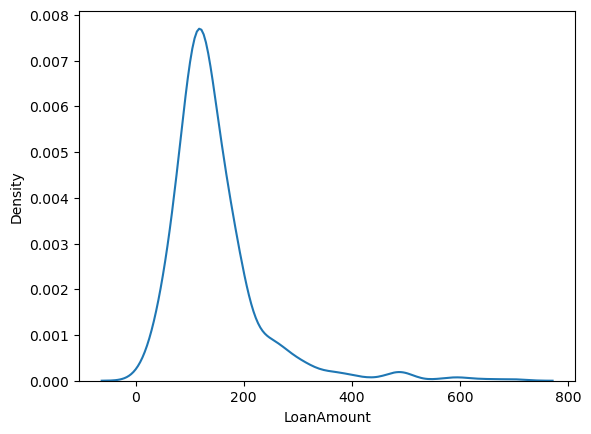

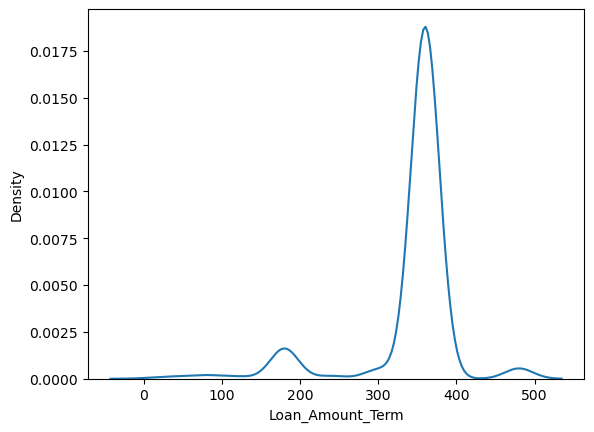

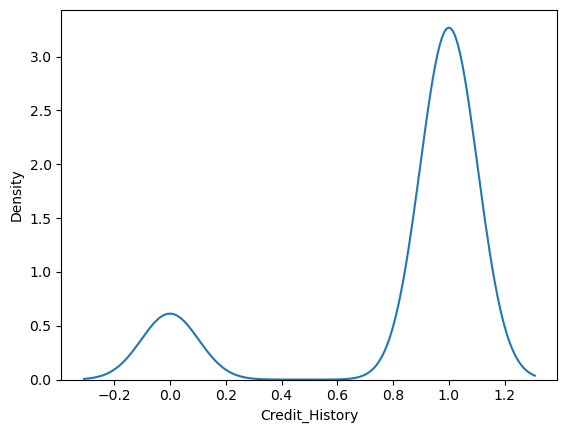

In [51]:
for i in continuous_column:
    sns.kdeplot(df1[i])
    plt.show()

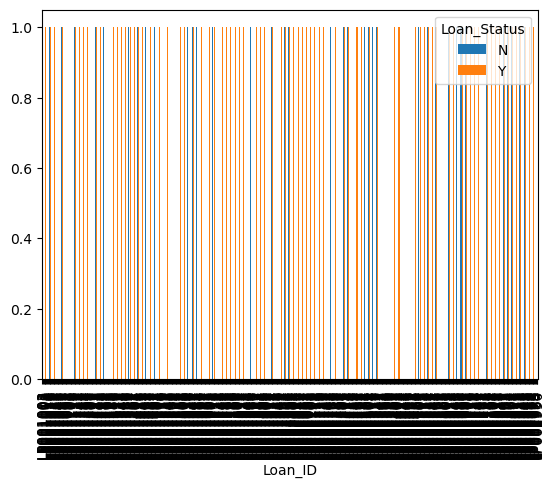

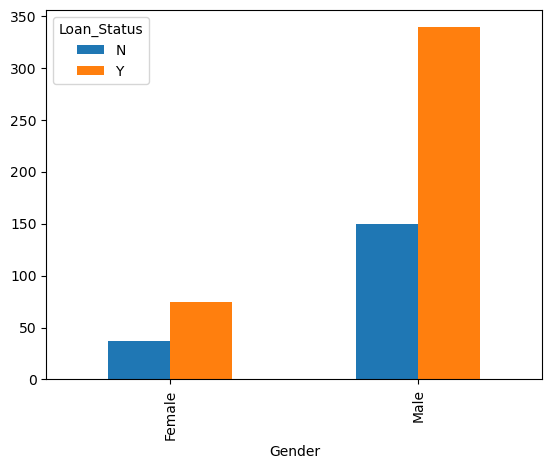

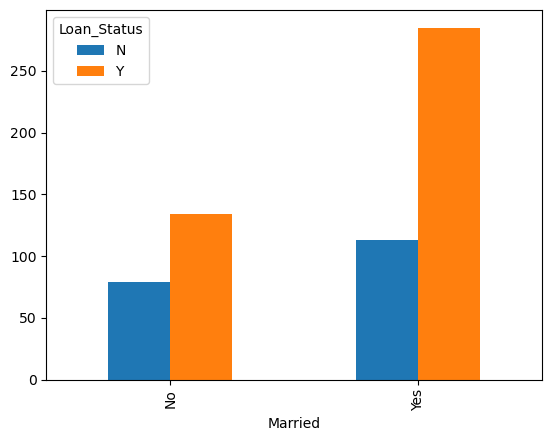

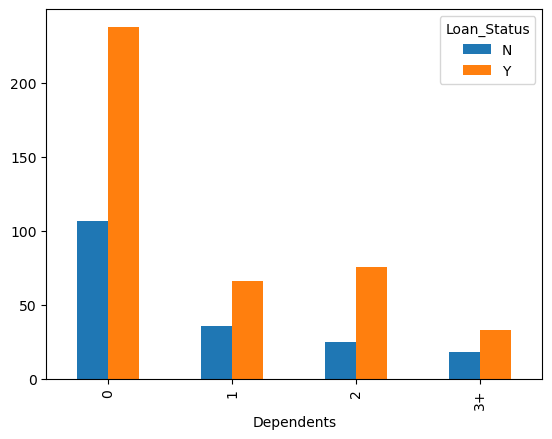

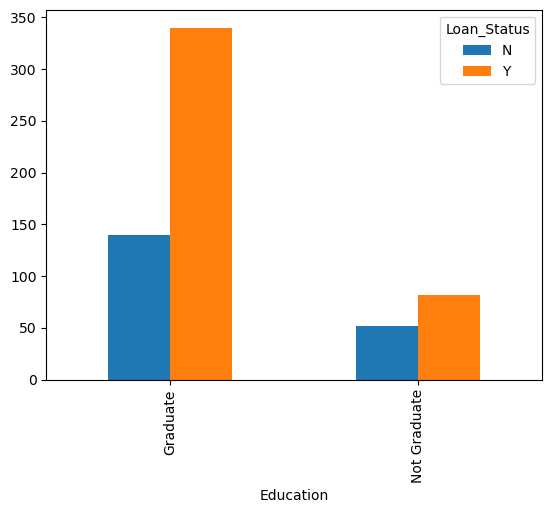

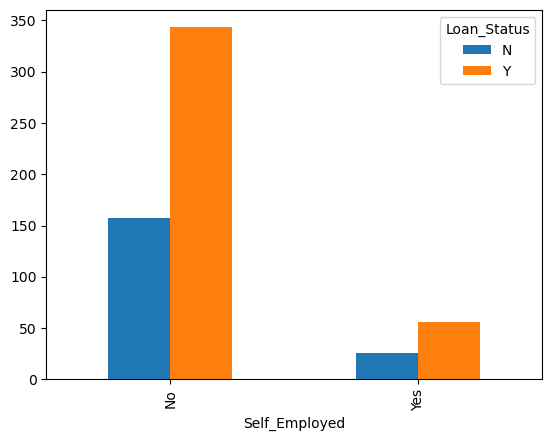

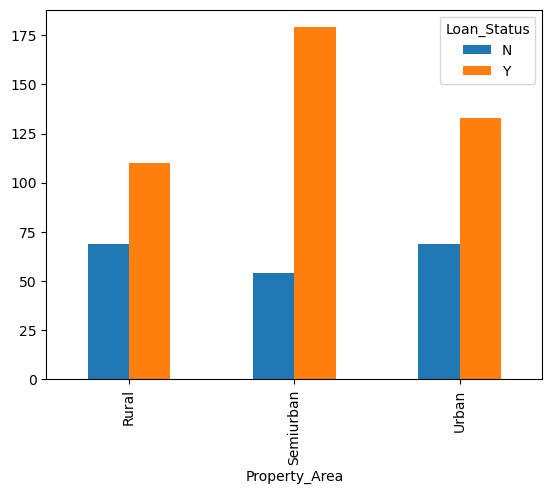

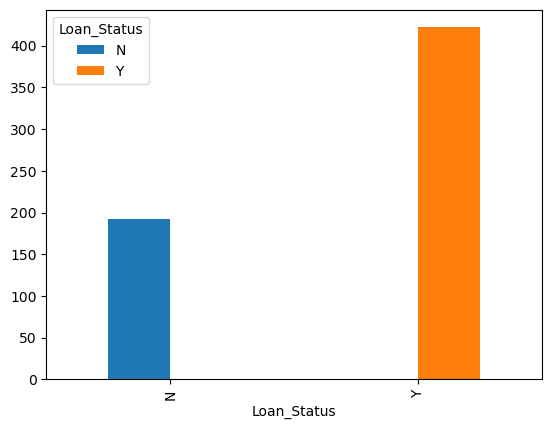

In [44]:
for i in categorical_column:
    (pd.crosstab(df1[i],df1["Loan_Status"])).plot(kind="bar")
    plt.show()

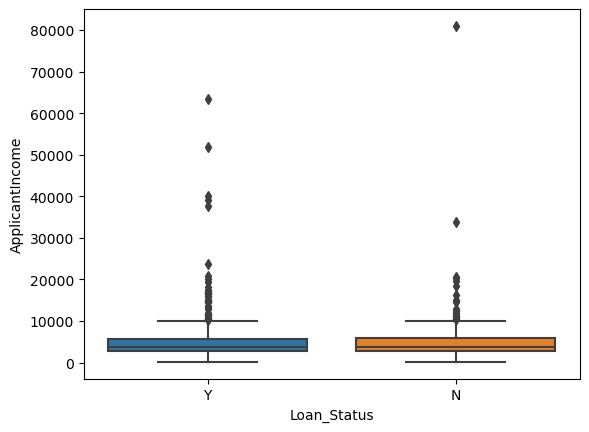

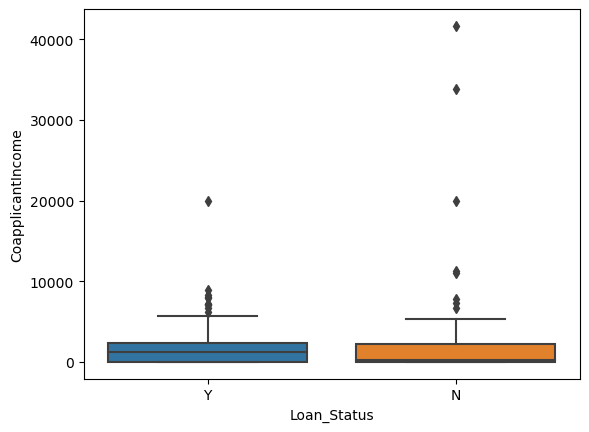

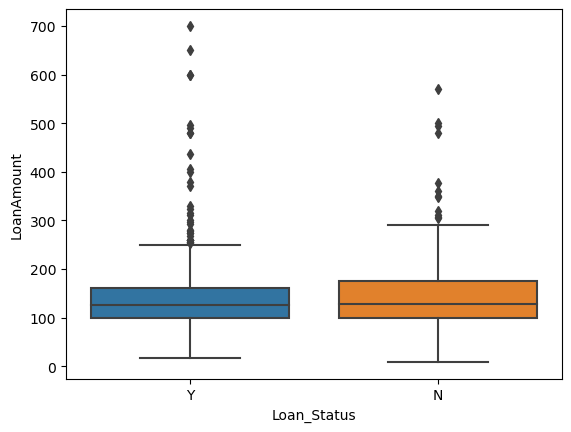

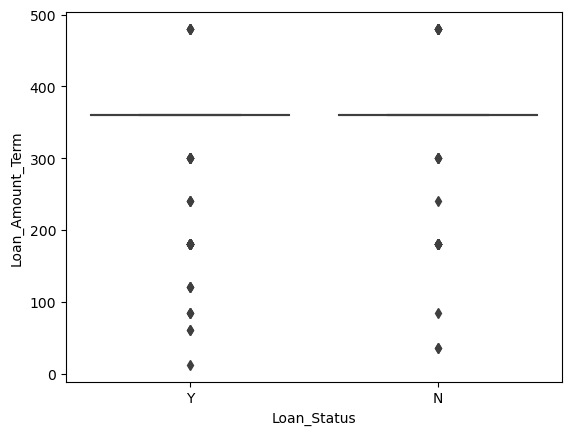

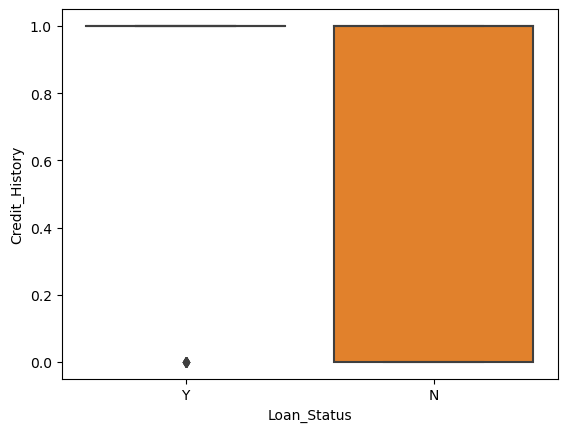

In [48]:
for i in continuous_column:
    sns.boxplot(df1,x="Loan_Status",y=i)
    plt.show()

In [53]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot: >

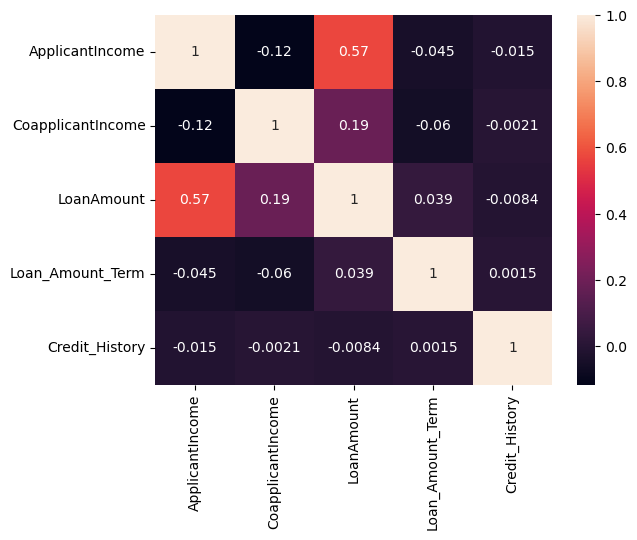

In [54]:
sns.heatmap(df1.corr(),annot=True)

In [ ]:
## Feature Engineering

In [55]:
categorical_column

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [66]:
df1['Gender'].replace({'Male':1,'Female':0},inplace=True)
df1['Married'].replace({'Yes':1,'No':0},inplace=True)
df1['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
df1['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df1['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df1['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [65]:
df1['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [69]:
df1=pd.get_dummies(df1,columns=["Property_Area"])

In [73]:
df1.drop('Loan_ID',axis=1,inplace=True)

In [74]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1,0,0
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,1,0,0
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,0,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,0,1


In [75]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
res=imputer.fit_transform(df1)
df=pd.DataFrame(res,columns=df1.columns)

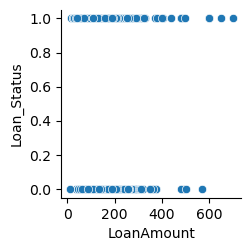

In [85]:
sns.pairplot(df,x_vars=['LoanAmount'],y_vars=['Loan_Status'])

In [78]:
df.LoanAmount

0      154.9
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

## Feature Selection

In [87]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [86]:
from sklearn.feature_selection import f_classif,chi2,VarianceThreshold,mutual_info_classif

<AxesSubplot: >

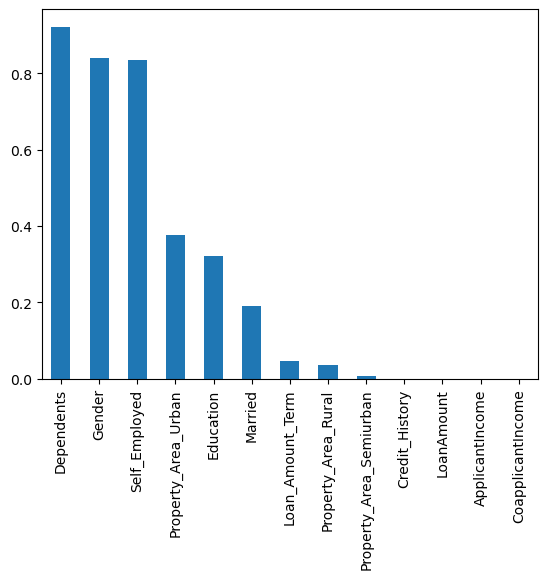

In [94]:
p,chi=chi2(X,y)
ser=pd.Series(chi,index=X.columns)
ser.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: >

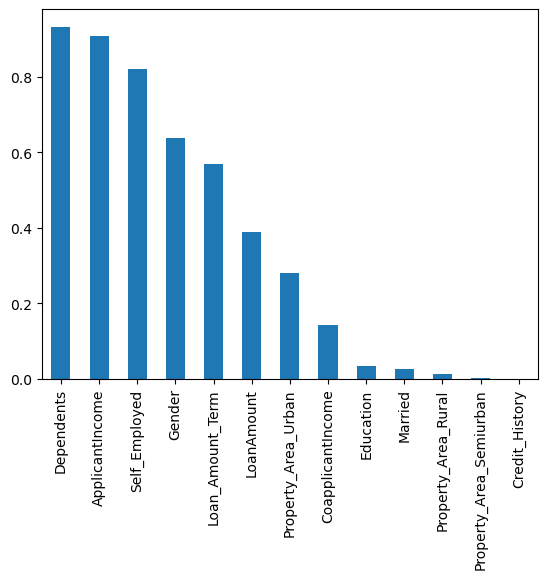

In [95]:
p,anno=f_classif(X,y)
an=pd.Series(anno,index=X.columns)
an.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: >

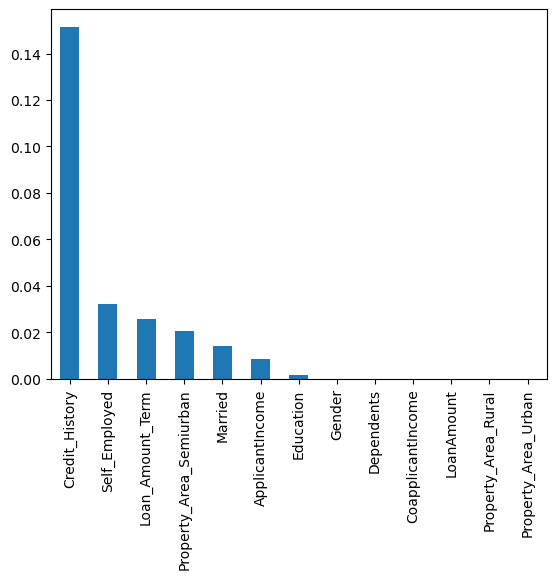

In [96]:
info=mutual_info_classif(X,y)
inf=pd.Series(info,index=X.columns)
inf.sort_values(ascending=False).plot(kind="bar")

In [99]:
var=VarianceThreshold(threshold=0.2)
var.fit_transform(X,y)
var.get_feature_names_out()

array(['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [102]:
# !pip install statsmodels

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot: >

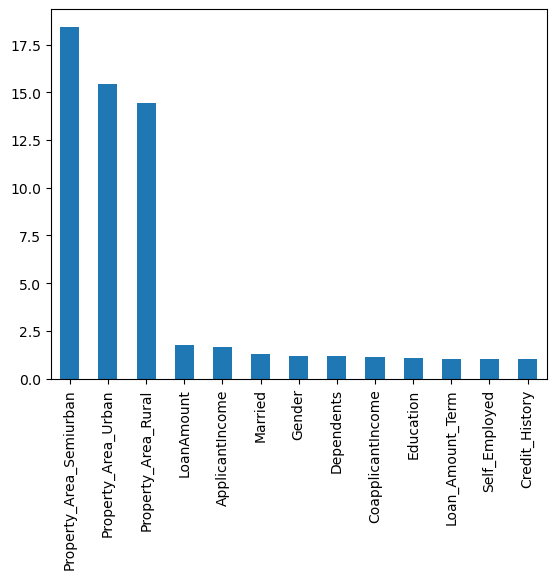

In [105]:
vif=[variance_inflation_factor(X.values,index) for index in range(len(X.columns))]
vf=pd.Series(vif,index=X.columns)
vf.sort_values(ascending=False).plot(kind="bar")

## Feature Scaling

In [108]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [110]:
# Our Data is imbalanced data,so we use sampling method
from imblearn.over_sampling import SMOTE

In [111]:
smt=SMOTE(sampling_strategy=0.90,k_neighbors=5,random_state=5)
X_smt,y_smt=smt.fit_resample(X,y)

In [112]:
y_smt.value_counts()

1.0    422
0.0    379
Name: Loan_Status, dtype: int64

In [139]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,train_size=0.78,random_state=5)

In [140]:
std=StandardScaler()
df_std_train=std.fit_transform(X_train)
df_std_test=std.transform(X_test)

In [ ]:
import pickle

In [ ]:
with open("stadard_scale.pickle","wb") as f:
    pickle.dump(std,f)

In [141]:
df_train=pd.DataFrame(df_std_train,columns=X.columns)
df_test=pd.DataFrame(df_std_test,columns=X.columns)

## Model Training

In [142]:
def Model_Eval(model,x,y):
    pred=model.predict(x)
    acc=accuracy_score(y,pred)
    print(f"Accuracy Score = {acc}")
    cm=confusion_matrix(y,pred)
    print(f"Confusion Matrix = {cm}")
    cr=classification_report(y,pred)
    print(f"Classification Report = {cr}")

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr=LogisticRegression()
lr.fit(df_std_train,y_train)

LogisticRegression()

In [145]:
Model_Eval(lr,df_std_train,y_train)

Accuracy Score = 0.7548076923076923
Confusion Matrix = [[181 123]
 [ 30 290]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.86      0.60      0.70       304
         1.0       0.70      0.91      0.79       320

    accuracy                           0.75       624
   macro avg       0.78      0.75      0.75       624
weighted avg       0.78      0.75      0.75       624



In [146]:
Model_Eval(lr,df_std_test,y_test)

Accuracy Score = 0.768361581920904
Confusion Matrix = [[43 32]
 [ 9 93]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.83      0.57      0.68        75
         1.0       0.74      0.91      0.82       102

    accuracy                           0.77       177
   macro avg       0.79      0.74      0.75       177
weighted avg       0.78      0.77      0.76       177



In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knn=KNeighborsClassifier()
knn.fit(df_std_train,y_train)

KNeighborsClassifier()

In [149]:
Model_Eval(knn,df_std_train,y_train)

Accuracy Score = 0.8477564102564102
Confusion Matrix = [[233  71]
 [ 24 296]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83       304
         1.0       0.81      0.93      0.86       320

    accuracy                           0.85       624
   macro avg       0.86      0.85      0.85       624
weighted avg       0.86      0.85      0.85       624



In [150]:
Model_Eval(knn,df_std_test,y_test)

Accuracy Score = 0.7570621468926554
Confusion Matrix = [[50 25]
 [18 84]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70        75
         1.0       0.77      0.82      0.80       102

    accuracy                           0.76       177
   macro avg       0.75      0.75      0.75       177
weighted avg       0.76      0.76      0.76       177



In [152]:
hyper_knn={"n_neighbors":np.arange(1,10),"p":[1,2]}
rmcv=GridSearchCV(knn,hyper_knn,cv=5)
rmcv.fit(df_std_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2]})

In [153]:
rmcv.best_params_

{'n_neighbors': 1, 'p': 1}

In [154]:
knn_para=KNeighborsClassifier(n_neighbors=1,p=1)
knn_para.fit(df_std_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [155]:
Model_Eval(knn,df_std_train,y_train)

Accuracy Score = 0.8477564102564102
Confusion Matrix = [[233  71]
 [ 24 296]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.91      0.77      0.83       304
         1.0       0.81      0.93      0.86       320

    accuracy                           0.85       624
   macro avg       0.86      0.85      0.85       624
weighted avg       0.86      0.85      0.85       624



In [156]:
Model_Eval(knn,df_std_test,y_test)

Accuracy Score = 0.7570621468926554
Confusion Matrix = [[50 25]
 [18 84]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70        75
         1.0       0.77      0.82      0.80       102

    accuracy                           0.76       177
   macro avg       0.75      0.75      0.75       177
weighted avg       0.76      0.76      0.76       177



In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt=DecisionTreeClassifier()
dt.fit(df_std_train,y_train)

DecisionTreeClassifier()

In [159]:
Model_Eval(dt,df_std_train,y_train)

Accuracy Score = 1.0
Confusion Matrix = [[304   0]
 [  0 320]]
Classification Report =               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       304
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



In [160]:
Model_Eval(dt,df_std_test,y_test)

Accuracy Score = 0.8022598870056498
Confusion Matrix = [[58 17]
 [18 84]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.76      0.77      0.77        75
         1.0       0.83      0.82      0.83       102

    accuracy                           0.80       177
   macro avg       0.80      0.80      0.80       177
weighted avg       0.80      0.80      0.80       177



In [169]:
hyper_dt={"criterion":['gini','entropy'],"max_depth":np.arange(1,8),"min_samples_split":np.arange(1,5),"min_samples_leaf":np.arange(1,2)}
rmcv=GridSearchCV(dt,hyper_dt,cv=5)
rmcv.fit(df_std_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([1]),
                         'min_samples_split': array([1, 2, 3, 4])})

In [170]:
rmcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [171]:
dt_para=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_leaf=1,min_samples_split=2)
dt_para.fit(df_std_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [172]:
Model_Eval(dt_para,df_std_train,y_train)

Accuracy Score = 0.8365384615384616
Confusion Matrix = [[209  95]
 [  7 313]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.97      0.69      0.80       304
         1.0       0.77      0.98      0.86       320

    accuracy                           0.84       624
   macro avg       0.87      0.83      0.83       624
weighted avg       0.86      0.84      0.83       624



In [173]:
Model_Eval(dt_para,df_std_test,y_test)

Accuracy Score = 0.8305084745762712
Confusion Matrix = [[48 27]
 [ 3 99]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.94      0.64      0.76        75
         1.0       0.79      0.97      0.87       102

    accuracy                           0.83       177
   macro avg       0.86      0.81      0.82       177
weighted avg       0.85      0.83      0.82       177



In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf=RandomForestClassifier()
rf.fit(df_std_train,y_train)

RandomForestClassifier()

In [176]:
Model_Eval(rf,df_std_train,y_train)

Accuracy Score = 1.0
Confusion Matrix = [[304   0]
 [  0 320]]
Classification Report =               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       304
         1.0       1.00      1.00      1.00       320

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624



In [177]:
Model_Eval(rf,df_std_test,y_test)

Accuracy Score = 0.8305084745762712
Confusion Matrix = [[57 18]
 [12 90]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.83      0.76      0.79        75
         1.0       0.83      0.88      0.86       102

    accuracy                           0.83       177
   macro avg       0.83      0.82      0.82       177
weighted avg       0.83      0.83      0.83       177



In [178]:
hyper_rf={"n_estimators":np.arange(1,50),"criterion":['gini','entropy'],"max_depth":np.arange(1,8),"min_samples_split":np.arange(1,5),"min_samples_leaf":np.arange(1,2)}
rmcv=GridSearchCV(rf,hyper_rf,cv=5)
rmcv.fit(df_std_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([1]),
                         'min_samples_split': array([1, 2, 3, 4]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [179]:
rmcv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 28}

In [180]:
rf_para=RandomForestClassifier(n_estimators=28,criterion="entropy",max_depth=6,min_samples_leaf=1,min_samples_split=2)
rf_para.fit(df_std_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=28)

In [181]:
Model_Eval(rf_para,df_std_train,y_train)

Accuracy Score = 0.8685897435897436
Confusion Matrix = [[228  76]
 [  6 314]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       304
         1.0       0.81      0.98      0.88       320

    accuracy                           0.87       624
   macro avg       0.89      0.87      0.87       624
weighted avg       0.89      0.87      0.87       624



In [182]:
Model_Eval(rf_para,df_std_test,y_test)

Accuracy Score = 0.8700564971751412
Confusion Matrix = [[ 54  21]
 [  2 100]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.96      0.72      0.82        75
         1.0       0.83      0.98      0.90       102

    accuracy                           0.87       177
   macro avg       0.90      0.85      0.86       177
weighted avg       0.88      0.87      0.87       177



In [183]:
from sklearn.ensemble import AdaBoostClassifier

In [184]:
ada=AdaBoostClassifier()
ada.fit(df_std_train,y_train)

AdaBoostClassifier()

In [186]:
Model_Eval(ada,df_std_train,y_train)

Accuracy Score = 0.8685897435897436
Confusion Matrix = [[242  62]
 [ 20 300]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       304
         1.0       0.83      0.94      0.88       320

    accuracy                           0.87       624
   macro avg       0.88      0.87      0.87       624
weighted avg       0.87      0.87      0.87       624



In [187]:
Model_Eval(ada,df_std_test,y_test)

Accuracy Score = 0.8135593220338984
Confusion Matrix = [[54 21]
 [12 90]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        75
         1.0       0.81      0.88      0.85       102

    accuracy                           0.81       177
   macro avg       0.81      0.80      0.81       177
weighted avg       0.81      0.81      0.81       177



In [188]:
hyper_ada={"n_estimators":np.arange(1,50),"learning_rate":np.arange(0.1,1,0.1)}
rmcv=GridSearchCV(ada,hyper_ada,cv=5)
rmcv.fit(df_std_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [189]:
rmcv.best_params_

{'learning_rate': 0.7000000000000001, 'n_estimators': 35}

In [190]:
ada_para=AdaBoostClassifier(n_estimators=35,learning_rate=0.7)
ada_para.fit(df_std_train,y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=35)

In [191]:
Model_Eval(ada_para,df_std_train,y_train)

Accuracy Score = 0.844551282051282
Confusion Matrix = [[232  72]
 [ 25 295]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.90      0.76      0.83       304
         1.0       0.80      0.92      0.86       320

    accuracy                           0.84       624
   macro avg       0.85      0.84      0.84       624
weighted avg       0.85      0.84      0.84       624



In [192]:
Model_Eval(ada_para,df_std_test,y_test)

Accuracy Score = 0.8135593220338984
Confusion Matrix = [[51 24]
 [ 9 93]]
Classification Report =               precision    recall  f1-score   support

         0.0       0.85      0.68      0.76        75
         1.0       0.79      0.91      0.85       102

    accuracy                           0.81       177
   macro avg       0.82      0.80      0.80       177
weighted avg       0.82      0.81      0.81       177



In [193]:
import pickle
import json

In [194]:
with open("dt_model.pickle","wb") as f:
    pickle.dump(dt_para,f)

In [195]:
with open("ada_model.pickle","wb") as f:
    pickle.dump(ada_para,f)

In [196]:
col={"columns":list(X.columns)}

In [197]:
with open("column_list","w") as f:
    json.dump(col,f)

In [1]:
!pip install flask

  Using cached Flask-2.2.2-py3-none-any.whl (101 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
